<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing necessary packages for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict 
from collections import Counter



In [2]:
# Saving your path to CVS file in your local machine in a variable "csv_file_path"
csv_file_path = '/Users/ajarakudaibergenova/Documents/Self Study/Datacamp/Netflix_Python/workspace/netflix_data.csv'


In [3]:
# Saving the Netflix CSV dataset as a DataFrame for easier Data Exploration

netflix_df = pd.read_csv(csv_file_path)
   

In [4]:
# Exploring the CVS file  

print(netflix_df.head())

  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1, 2017          2016         1

In [5]:
# PART 1. DATA EXPLORATION. General Dataset Info

netflix_df.info()

# Here we can see that we have 11 columns in this dataset and 4812 rows. 
# Most of the columns are text-based while only 2(release_year , duration) are int64(integers2)
# Also we can notice that there are NONE missing values, so we can skip part of finding NULLS. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [6]:
# Statistical Exploration of columns with int64 type

print(netflix_df.describe())

# Here we can see that the Earliest Release Year is 1942 and the Latest is 2021. 
# The minimum duration of the movie is 1 minute, the longest movie is 4h 21 min(253 min)
# The average duration of the movie is 1h 20 min (99 min)
# 30 min is an average dispertion from the average (mean) duration (30)

       release_year     duration
count   4812.000000  4812.000000
mean    2012.711554    99.566708
std        9.517978    30.889305
min     1942.000000     1.000000
25%     2011.000000    88.000000
50%     2016.000000    99.000000
75%     2018.000000   116.000000
max     2021.000000   253.000000


In [7]:
# Validating the row count of the dataset

row_count = len(netflix_df)
row_count


4812

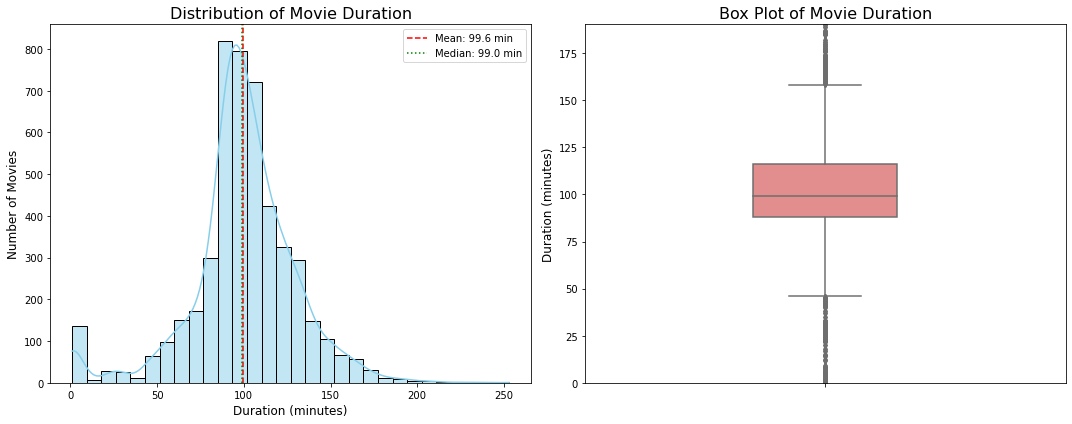

In [8]:
# Let's explore each movie Duration (minutes)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) # Histogram
sns.histplot(netflix_df['duration'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.axvline(netflix_df['duration'].mean(), color='red', linestyle='--', label=f'Mean: {netflix_df["duration"].mean():.1f} min')
plt.axvline(netflix_df['duration'].median(), color='green', linestyle=':', label=f'Median: {netflix_df["duration"].median():.1f} min')
plt.legend()


# From the vizual we can validate that the mean duration is 99.6 min and the longest duration is 253 min.

plt.subplot(1, 2, 2) # Box Plot
sns.boxplot(y=netflix_df['duration'], color='lightcoral', width=0.3)
plt.title('Box Plot of Movie Duration', fontsize=16)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.ylim(0, netflix_df['duration'].quantile(0.99) * 1.1) # Limit y-axis to focus on main distribution and exclude extreme outliers
plt.tight_layout()
plt.show()


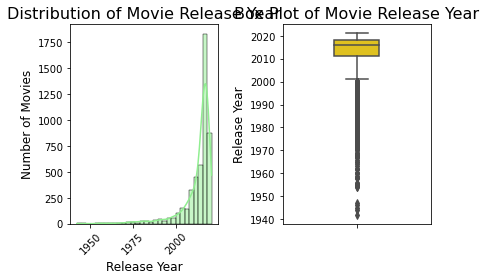

In [9]:
# Let's vizualize Release_Year as well

plt.subplot(1, 2, 1) # Histogram
sns.histplot(netflix_df['release_year'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)

# From here we can see that most of the movies were mostly released in 2012

plt.subplot(1, 2, 2) # Box Plot
sns.boxplot(y=netflix_df['release_year'], color='gold', width=0.3)
plt.title('Box Plot of Movie Release Year', fontsize=16)
plt.ylabel('Release Year', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
# PART 2. BUSINESS INSIGHTS

# Now, Let's answer to the Business Question: 
# "What was the most frequent movie duration in the 1990s? 
# Save an approximate answer as an integer called duration (use 1990 as the decade's start year).



In [11]:
# First, let's filter release_year to include all years from 1990 and 1999 inclusively

movies_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)]

In [12]:
# Finding the most frequent duration from the filtered subset 
# .mode() returns a Series, as there might be multiple modes. We'll take the first one.

freq_duration_90s = movies_1990s['duration'].mode()
freq_duration_90s

0    94
Name: duration, dtype: int64

In [13]:
# Saving duration inn variable 'duration'

duration = int(freq_duration_90s)


In [14]:
# Answering for the business question

print(f"The most frequent movie duration in the 1990s was: {duration} minutes")

The most frequent movie duration in the 1990s was: 94 minutes


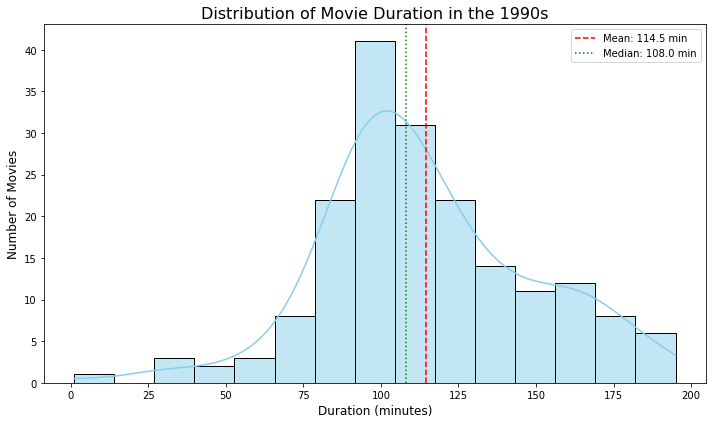

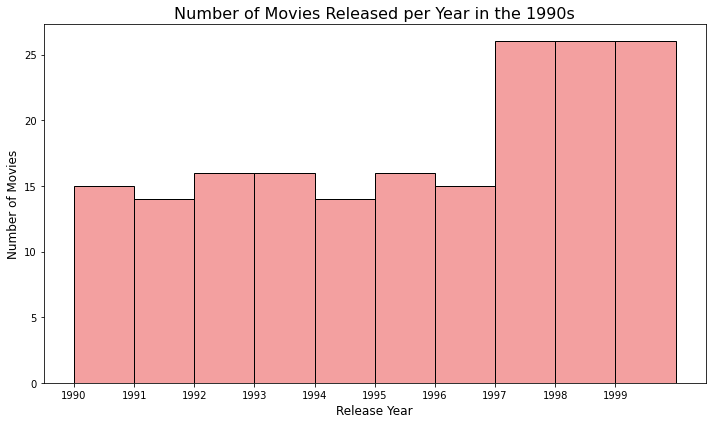

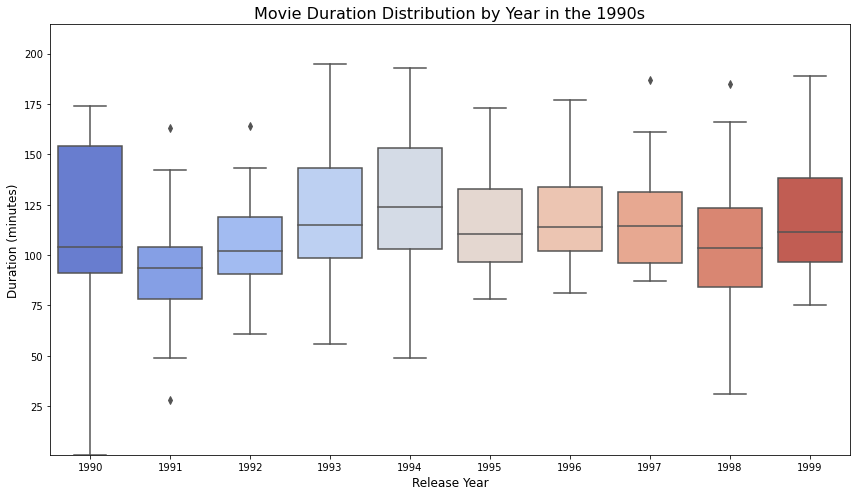

In [15]:
# Visualizing Distribution of Duration in 1990s
plt.figure(figsize=(10, 6))
sns.histplot(movies_1990s['duration'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Duration in the 1990s', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.axvline(movies_1990s['duration'].mean(), color='red', linestyle='--', label=f'Mean: {movies_1990s["duration"].mean():.1f} min')
plt.axvline(movies_1990s['duration'].median(), color='green', linestyle=':', label=f'Median: {movies_1990s["duration"].median():.1f} min')
plt.legend()
plt.tight_layout()
plt.show()

# Visualizing Distribution in Histogram
plt.figure(figsize=(10, 6))
    # Ensuring bins cover each year for distinct bars
sns.histplot(movies_1990s['release_year'], bins=range(1990, 2001), kde=False, color='lightcoral', edgecolor='black')
plt.title('Number of Movies Released per Year in the 1990s', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(range(1990, 2000)) # Ensure all years in the decade are shown
plt.tight_layout()
plt.show()

# Visuazing the change in duration of movies during 90s

plt.figure(figsize=(12, 7))
sns.boxplot(data=movies_1990s, x='release_year', y='duration', palette='coolwarm')
plt.title('Movie Duration Distribution by Year in the 1990s', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
    # Adjusting y-lim dynamically, adding a small buffer to min/max
min_dur = movies_1990s['duration'].min()
max_dur = movies_1990s['duration'].max()
plt.ylim(min_dur * 0.9, max_dur * 1.1)
plt.tight_layout()
plt.show()

In [16]:
# Now, Let's answer to another Business Question: 
# A movie is considered short if it is less than 90 minutes. 
# Count the number of short action movies released in the 1990s and save this integer as short_movie_count.


In [17]:
# Checking if movie is short or not in 1990s

short = movies_1990s['duration'] < 90

In [18]:
# Checkig if genre is "action" or NOT

action = movies_1990s['genre'].str.contains('Action', case=False, na=False)


In [19]:
short_action_movies_1990s = movies_1990s[short & action]


In [20]:
# Counting the number of short movies
short_movie_count = len(short_action_movies_1990s)
print(f" The number of short action movies released in the 1990s : {short_movie_count}")

 The number of short action movies released in the 1990s : 7


In [21]:
# PART 3. Deeper Temporal Analysis:

# 1. Let's Find Average Movie Durations: Per-year shifts and Decadal Analysis

# First, let's filter for movies only
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()


In [22]:
# We just need to rename the column for clarity in analysis if desired, or just use 'duration' directly.
movies_df['duration_minutes'] = movies_df['duration']


In [23]:
# Average Duration Per-Year


avg_duration_per_year = movies_df.groupby('release_year')['duration_minutes'].mean().reset_index()


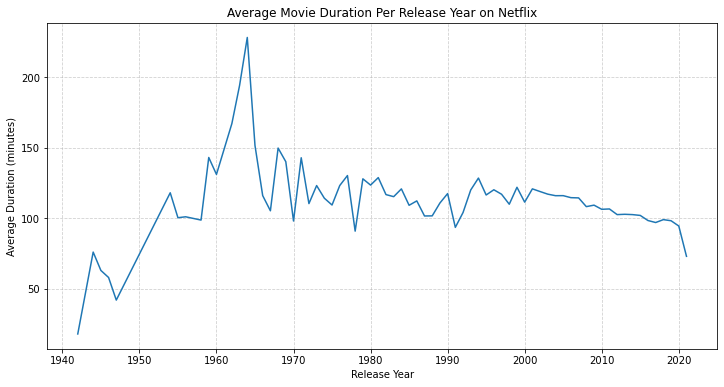

In [24]:
# Average Movie Duration
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_per_year['release_year'], y=avg_duration_per_year['duration_minutes']) # Pass Series directly
plt.title('Average Movie Duration Per Release Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [25]:
# Analysis of Changes (Acceleration/Deceleration)
# Calculate year-over-year change

avg_duration_per_year['YoY_change'] = avg_duration_per_year['duration_minutes'].diff()


In [26]:
# Calculate acceleration/deceleration (change in change)
avg_duration_per_year['acceleration'] = avg_duration_per_year['YoY_change'].diff()

In [27]:
print("\nAverage Movie Duration per Year and its Changes:")
print(avg_duration_per_year.head(10)) # Display first few rows
print(avg_duration_per_year.tail(10)) # Display last few rows


Average Movie Duration per Year and its Changes:
   release_year  duration_minutes  YoY_change  acceleration
0          1942         18.000000         NaN           NaN
1          1944         76.000000   58.000000           NaN
2          1945         63.000000  -13.000000    -71.000000
3          1946         58.000000   -5.000000      8.000000
4          1947         42.000000  -16.000000    -11.000000
5          1954        118.000000   76.000000     92.000000
6          1955        100.333333  -17.666667    -93.666667
7          1956        101.000000    0.666667     18.333333
8          1958         98.666667   -2.333333     -3.000000
9          1959        143.000000   44.333333     46.666667
    release_year  duration_minutes  YoY_change  acceleration
61          2012        102.541096   -4.005913     -4.254534
62          2013        102.766667    0.225571      4.231483
63          2014        102.534562   -0.232104     -0.457675
64          2015        101.960725   -0.573837

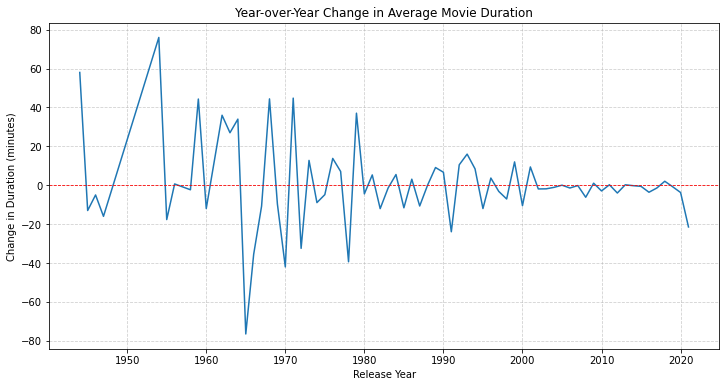

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_per_year, x='release_year', y='YoY_change')
plt.title('Year-over-Year Change in Average Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Change in Duration (minutes)')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Line at zero for reference
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [29]:
# Average Duration by Decade 
# Creating a 'decade' column
movies_df['decade'] = (movies_df['release_year'] // 10) * 10


In [30]:
# Grouping By Decate
avg_duration_per_decade = movies_df.groupby('decade')['duration_minutes'].mean().reset_index()


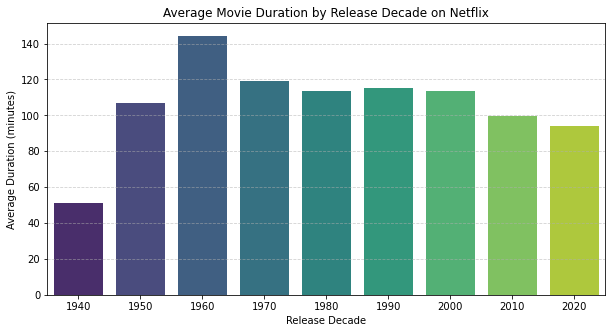


Average Movie Duration by Decade:
   decade  duration_minutes
0    1940         51.400000
1    1950        107.090909
2    1960        144.250000
3    1970        119.083333
4    1980        113.557895
5    1990        115.120219
6    2000        113.424448
7    2010         99.797980
8    2020         94.270115


In [31]:
# Visualizing Results
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_duration_per_decade, x='decade', y='duration_minutes', palette='viridis')
plt.title('Average Movie Duration by Release Decade on Netflix')
plt.xlabel('Release Decade')
plt.ylabel('Average Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("\nAverage Movie Duration by Decade:")
print(avg_duration_per_decade)

In [32]:
# 2.  Let's explore of the growth rate of unique movie entries on Netflix over time
# We need to ensure 'date_added' is in datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df.dropna(subset=['date_added'], inplace=True) 


In [33]:
# Group by date_added and count unique entries (assuming each row is unique entry)
# If a single row represents a unique content entry, then df.groupby().size().cumsum() is enough.

daily_additions = netflix_df.groupby(netflix_df['date_added'].dt.date).size().reset_index(name='count')
daily_additions['cumulative_count'] = daily_additions['count'].cumsum()


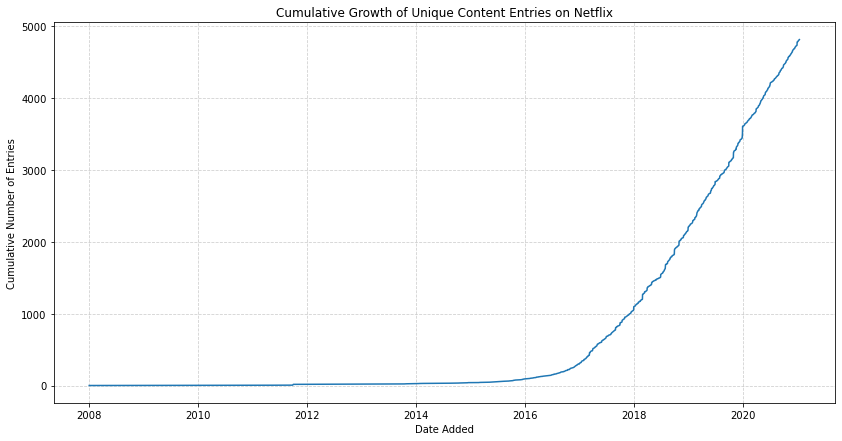

In [34]:
# To look at growth rate, we can look at the cumulative count
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_additions, x='date_added', y='cumulative_count')
plt.title('Cumulative Growth of Unique Content Entries on Netflix')
plt.xlabel('Date Added')
plt.ylabel('Cumulative Number of Entries')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


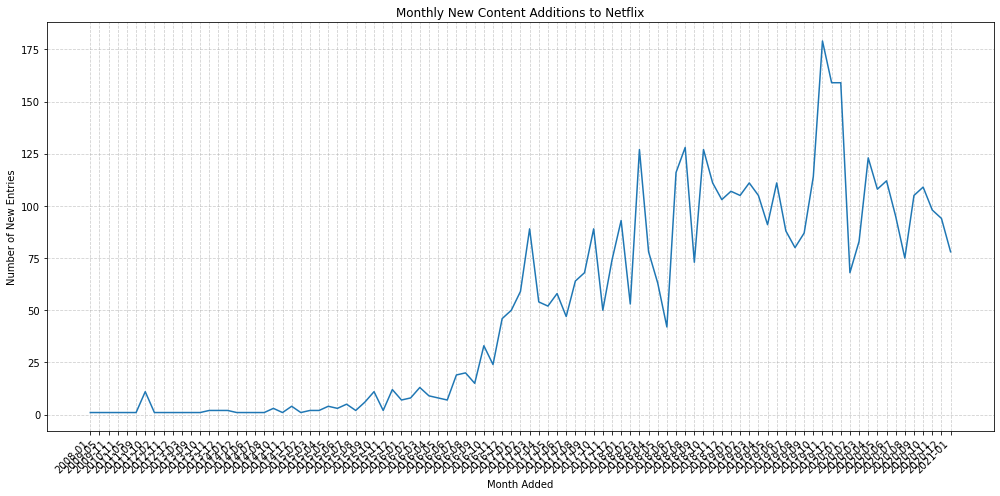

In [35]:

# To see periods of accelerated growth, look at the daily/monthly additions count
# Group by month for smoother visualization
monthly_additions = netflix_df.groupby(netflix_df['date_added'].dt.to_period('M')).size().reset_index(name='count')
monthly_additions['date_added'] = monthly_additions['date_added'].astype(str) # For plotting as string
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_additions, x='date_added', y='count')
plt.title('Monthly New Content Additions to Netflix')
plt.xlabel('Month Added')
plt.ylabel('Number of New Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()